In [ ]:
import torch
torch.__version__

#Classification using Neural Network

##Flow of Program
0. import Important Libraries
1. Get dataset ready(turn into tensor,batch)
2. Build a neural network model for classification
3. Pick a loss function and optimizer
4. Building a Training loop
5. Evaluate model
6. Improving the model
7. Save the model

###**0. import Important Libraries**

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

###**1. Prepare Data (convert it to tensor , Make batches)**

In [ ]:
train_dataset = datasets.FashionMNIST(root='./dataset',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = datasets.FashionMNIST(root='./dataset',train=False,transform=transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:04<00:00, 5453341.67it/s]


Extracting ./dataset/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./dataset/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 170909.98it/s]


Extracting ./dataset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3094800.39it/s]


Extracting ./dataset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 3166951.74it/s]

Extracting ./dataset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/FashionMNIST/raw



In [ ]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
len(train_dataset),len(test_dataset)

(60000, 10000)

In [ ]:
batch_size=64

In [ ]:
train_batch_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_batch_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [ ]:
len(train_batch_loader),len(test_batch_loader)

(938, 157)

###**3. Build a Neural Network for Classification**

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self,in_dim,n_hidden_1,n_hidden_2,out_dim):
    super().__init__()
    self.layer1=nn.Sequential(
        nn.Linear(in_dim,n_hidden_1),
        nn.ReLU(True)
    )
    self.layer2=nn.Sequential(
        nn.Linear(n_hidden_1,n_hidden_2),
        nn.ReLU(True)
    )
    self.layer3=nn.Sequential(
        nn.Linear(n_hidden_2,out_dim),
        nn.ReLU(True)
    )

  def forward(self,x):
    x=self.layer1(x)
    x=self.layer2(x)
    x=self.layer3(x)
    return x


In [ ]:
in_dim=28*28
n_hidden_1=300
n_hidden_2=100
out_dim=10

In [ ]:
model = NeuralNetwork(in_dim,n_hidden_1,n_hidden_2,out_dim)

In [ ]:
model

NeuralNetwork(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda'

In [ ]:
model = model.to(device)

###**4. Pick a Loss Function and Optimizer**

In [ ]:
learning_rate = 0.001

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

###**5. Build a training loop**

In [ ]:
epochs=10

In [ ]:
#training loop
for epoch in range(epochs):
  print("*"*10)
  print(f"Epoch : {epoch+1}")
  running_loss=0.0
  running_acc=0.0
  for i,data in enumerate(train_batch_loader,1):
      img,label=data
      img=img.view(img.size(0),-1)
      img=img.to(device)
      label=label.to(device)
      out=model(img)
      loss=criterion(out,label)
      running_loss+=loss.item()
      _,pred=torch.max(out,1)
      running_acc+=(pred==label).float().mean()
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if i%300 == 0:
        print(f"[{epoch+1}/{epochs}],loss:{running_loss/i:.6f},Accuracy:{running_acc/i:.6f}")

  print(f"Finish:{epoch+1},loss={running_loss/i:.6f},Accuracy:{running_acc/i:.6f}")

**********
Epoch : 1
[1/10],loss:1.175697,Accuracy:0.559010
[1/10],loss:1.129011,Accuracy:0.570573
[1/10],loss:1.104933,Accuracy:0.576163
Finish:1,loss=1.102816,Accuracy:0.577192
**********
Epoch : 2
[2/10],loss:1.022190,Accuracy:0.598490
[2/10],loss:1.019710,Accuracy:0.598672
[2/10],loss:1.012309,Accuracy:0.601094
Finish:2,loss=1.011817,Accuracy:0.601463
**********
Epoch : 3
[3/10],loss:0.981597,Accuracy:0.610729
[3/10],loss:0.983417,Accuracy:0.608672
[3/10],loss:0.984261,Accuracy:0.607813
Finish:3,loss=0.982709,Accuracy:0.608709
**********
Epoch : 4
[4/10],loss:0.960271,Accuracy:0.614323
[4/10],loss:0.967838,Accuracy:0.612031
[4/10],loss:0.961382,Accuracy:0.615035
Finish:4,loss=0.960820,Accuracy:0.615438
**********
Epoch : 5
[5/10],loss:0.944609,Accuracy:0.622135
[5/10],loss:0.947751,Accuracy:0.619844
[5/10],loss:0.950001,Accuracy:0.618507
Finish:5,loss=0.950730,Accuracy:0.618070
**********
Epoch : 6
[6/10],loss:0.938241,Accuracy:0.625313
[6/10],loss:0.939772,Accuracy:0.623438
[6/10]

###**5. Evaluate Your model**

In [ ]:
model.eval()
eval_loss=0.0
eval_acc=0.0
for data in test_batch_loader:
  img,label=data
  img=img.view(img.size(0),-1)
  img=img.to(device)
  label=label.to(device)
  with torch.no_grad():
    out=model(img)
    loss=criterion(out,label)
    eval_loss+=loss.item()
    _,pred=torch.max(out,1)
    eval_acc+=(pred==label).float().mean()
print(f"Test loss={eval_loss/len(test_batch_loader):.6f},Accuracy:{eval_acc/len(test_batch_loader):.6f}")

Test loss=0.977050,Accuracy:0.613754


##5.1 Visualize the data

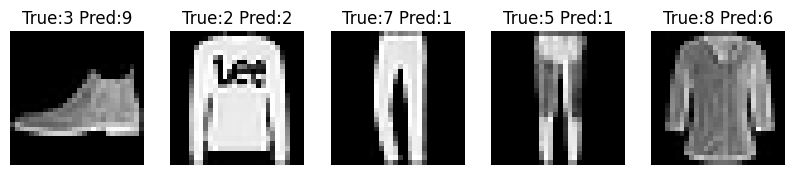

In [ ]:
images,labels=next(iter(test_batch_loader))
images=images.reshape(-1,28*28).to(device)
labels=labels.to(device)
outputs=model(images)
_,pred=torch.max(outputs,1)
fix,ax=plt.subplots(1,5,figsize=(10,5))
for i in range(5):
  ax[i].imshow(images[i].reshape(28,28).cpu(),cmap='gray')
  ax[i].set_title(f"True:{label[i].item()} Pred:{pred[i].item()}")
  ax[i].axis('off')
plt.show()




###**6. Improve the neural Network model**

change Learninhg rate<br>
add layers<br>
change activation function<br>

###**7. Save Model**

In [ ]:
torch.save(model.state_dict(),'./Classification_pytorch.pth')